In [1]:
#snippet to mount drive and copy kaggle API keys
# from google.colab import drive
# drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
!kaggle datasets download -d fedesoriano/cirrhosis-prediction-dataset
!unzip -q *.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset
License(s): copyright-authors
  0% 0.00/11.0k [00:00<?, ?B/s]
100% 11.0k/11.0k [00:00<00:00, 19.2MB/s]


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# dataset_link = "https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset"
cir = pd.read_csv('/content/cirrhosis.csv')
cir.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


1. ID: Unique identifier.
2. N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986.
3. Status: Status of the patient C (censored), CL (censored due to liver tx), or D (death).
4. Drug: Type of drug D-penicillamine or placebo.
5. Age: Age in [days].
6. Sex: M (male) or F (female).
7. Ascites: Presence of ascites N (No) or Y (Yes).
8. Hepatomegaly: Presence of hepatomegaly N (No) or Y (Yes).
9. Spiders: Presence of spiders N (No) or Y (Yes).
10. Edema: Presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).
11. Bilirubin: Serum bilirubin in [mg/dl].
12. Cholesterol: Serum cholesterol in [mg/dl].
13. Albumin: Albumin in [gm/dl].
14. Copper: Urine copper in [ug/day].
15. Alk_Phos: Alkaline phosphatase in [U/liter].
16. SGOT: SGOT in [U/ml].
17. Triglycerides: Triglicerides in [mg/dl].
18. Platelets: Platelets per cubic [ml/1000].
19. Prothrombin: Prothrombin time in seconds [s].
20. Stage: Histologic stage of disease (1, 2, 3, or 4).

In [6]:
print(f'Shape of the dataset is :: \n Rows: {cir.shape[0]} \n Columns: {cir.shape[1]}')

Shape of the dataset is :: 
 Rows: 418 
 Columns: 20


In [7]:
cir.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
null_table = pd.DataFrame({'Features': cir.columns, 'Null values': cir.isnull().sum().values,  'Data Type': cir.dtypes})
null_table

,Features,Null values,Data Type
ID,ID,0,int64
N_Days,N_Days,0,int64
Status,Status,0,object
Drug,Drug,106,object
Age,Age,0,int64
Sex,Sex,0,object
Ascites,Ascites,106,object
Hepatomegaly,Hepatomegaly,106,object
Spiders,Spiders,106,object
Edema,Edema,0,object


In [9]:
print(f" Number of duplicate rows is :: {cir.duplicated().sum()}")

 Number of duplicate rows is :: 0


In [10]:
cir.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [11]:
num_variables = [i for i in cir.columns if (cir.dtypes[i]) in ['int64', 'float64']]
num_variables

['ID',
 'N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [12]:
num_variables= num_variables[1:-1]
num_variables

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

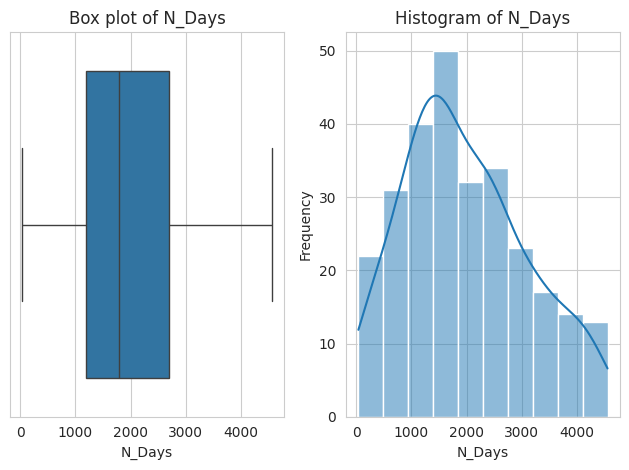

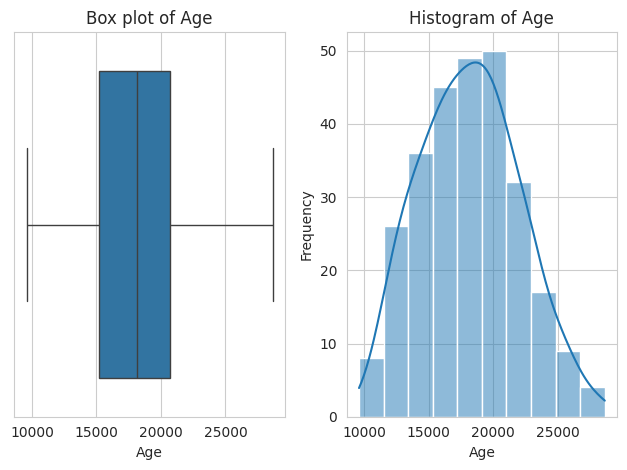

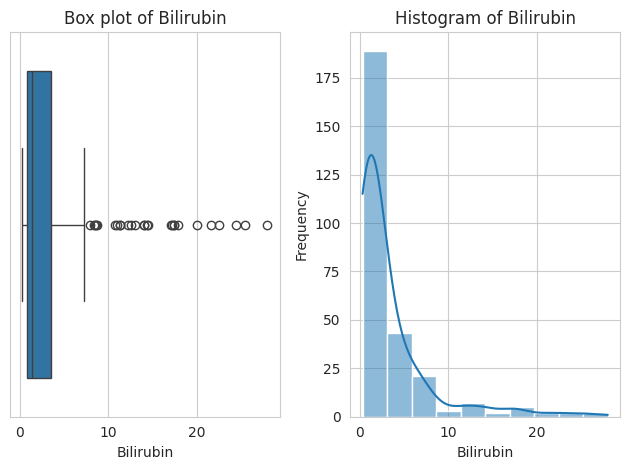

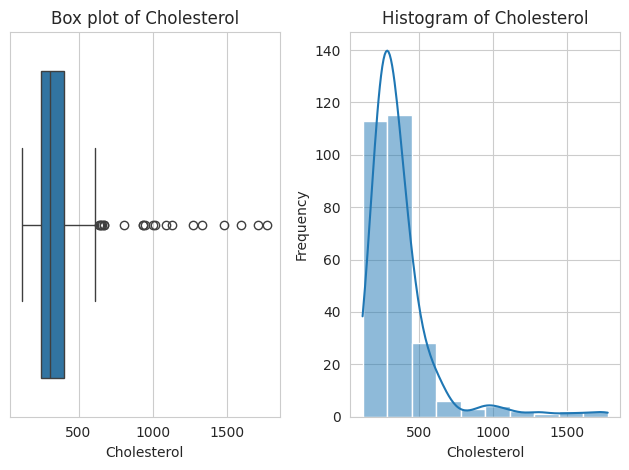

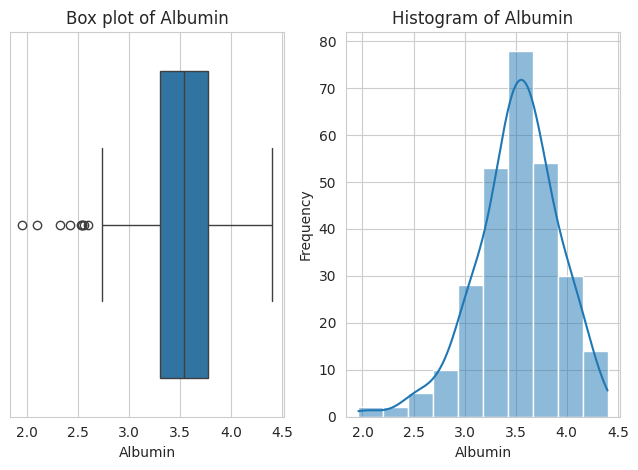

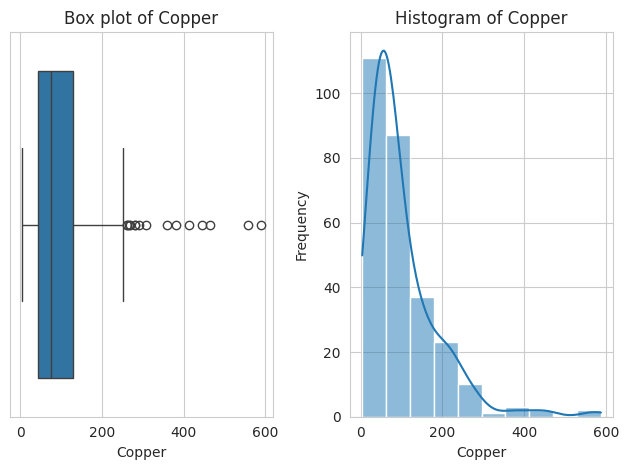

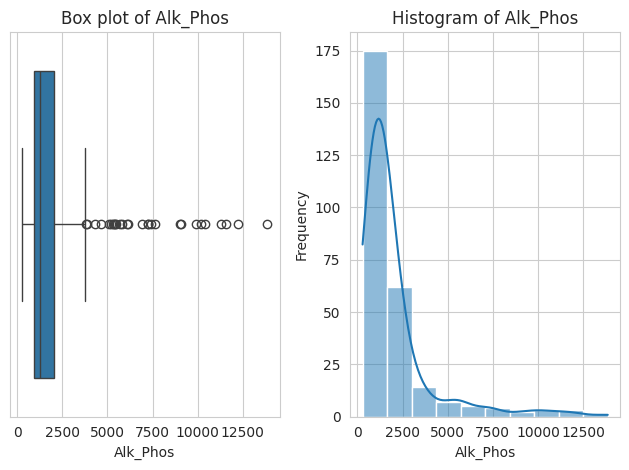

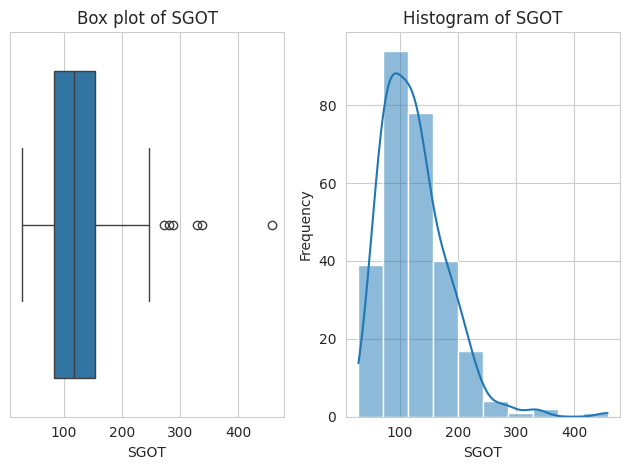

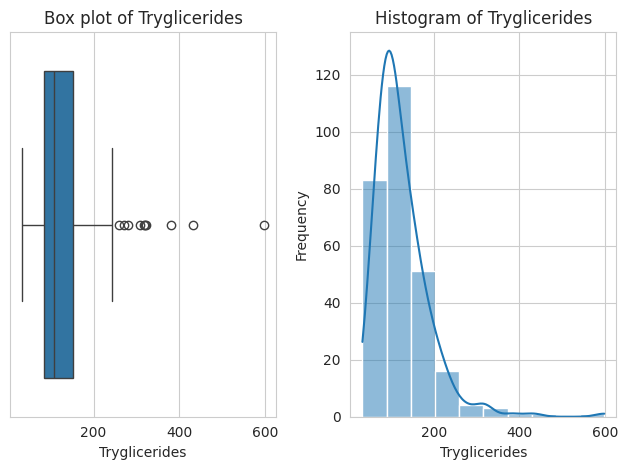

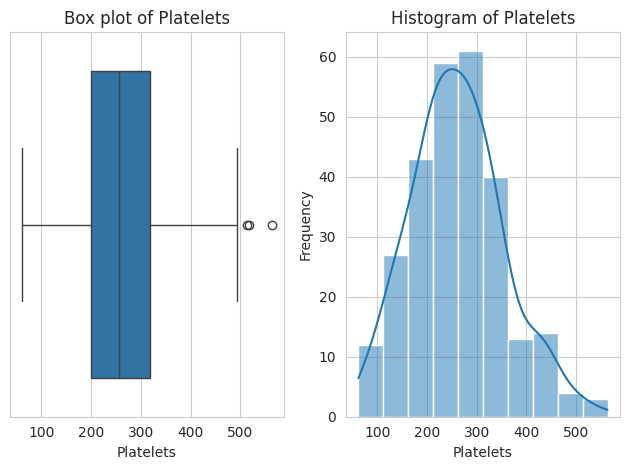

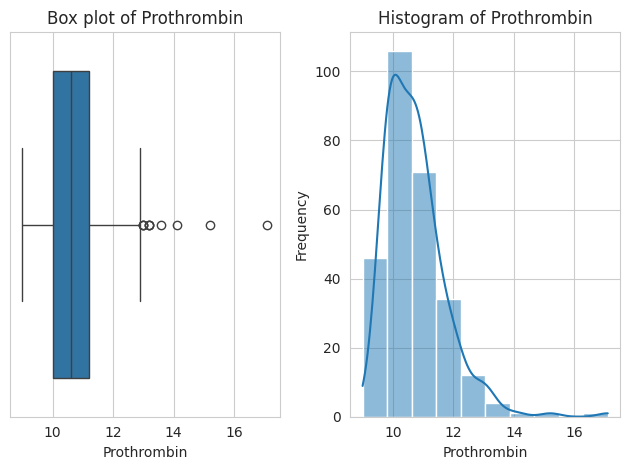

In [13]:
sns.set_style('whitegrid')
def create_variable_plots(variable):
  fig, axes = plt.subplots(1, 2)
  plt.subplot(1, 2, 1)
  sns.boxplot(data = cir.dropna(), x = variable)
  plt.xlabel(variable)
  plt.title(f'Box plot of {variable}')

  plt.subplot(1,2,2)
  sns.histplot(data = cir.dropna(), x = variable, kde = True, bins = 10)
  plt.xlabel(variable)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {variable}')

  plt.tight_layout()

  plt.show()


for variables in num_variables:
  create_variable_plots(variables)


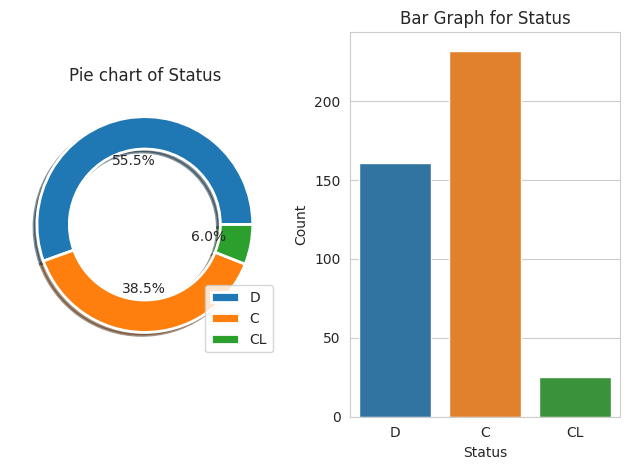

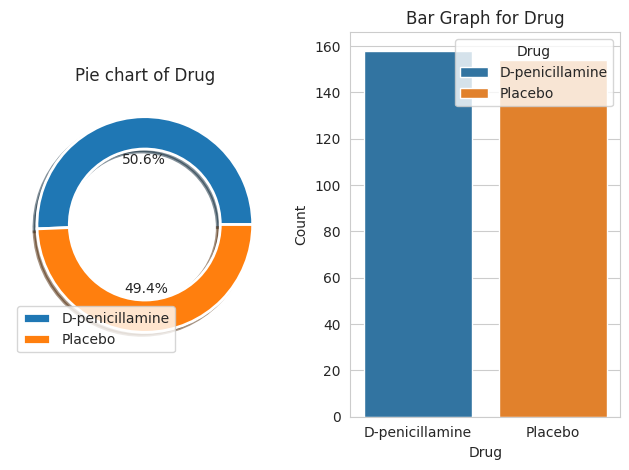

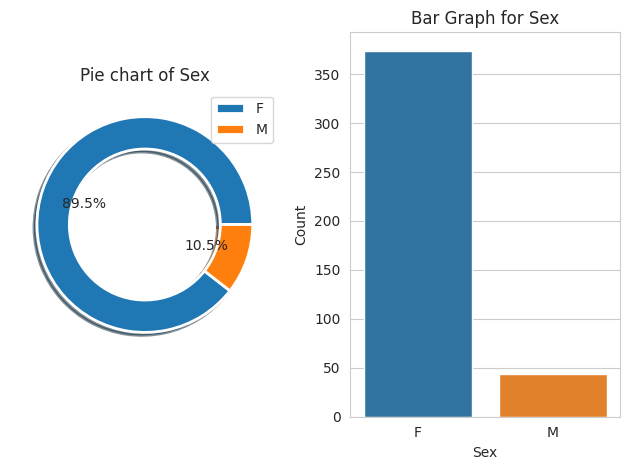

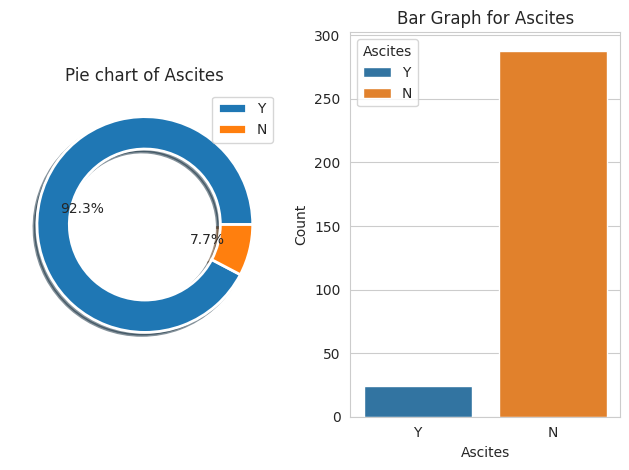

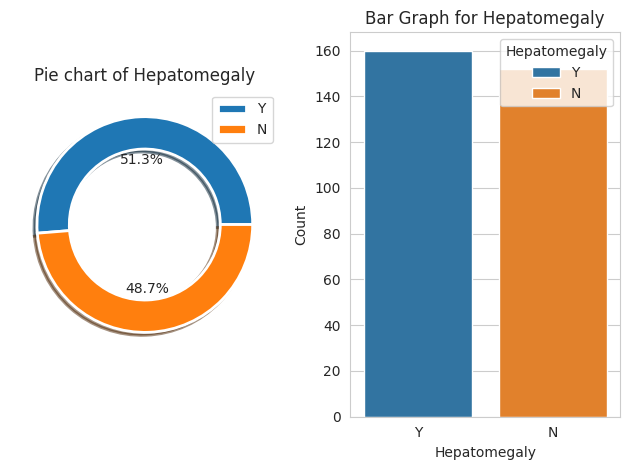

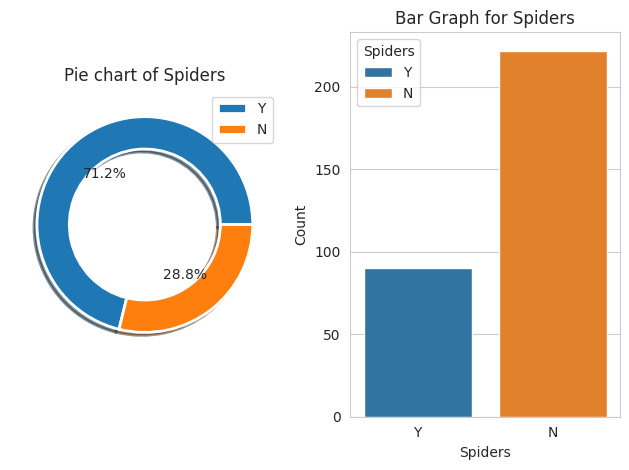

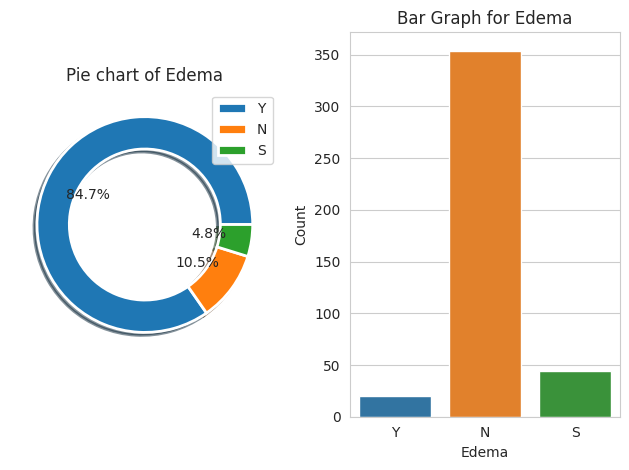

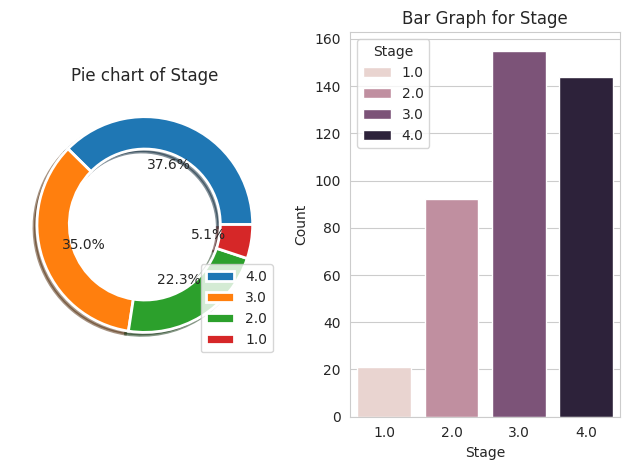

In [14]:
cat_variables = [i for i in cir.columns if i not in num_variables]
cat_variables.remove('ID')


def create_categorical_plots(variable):
  fig, axes = plt.subplots(1, 2)

  plt.subplot(1,2,1)
  plt.pie(cir[variable].value_counts(), autopct='%1.1f%%',  wedgeprops = {'linewidth': 2, 'width': 0.3}, shadow = True)
  plt.title(f'Pie chart of {variable}')
  plt.legend(cir[variable].unique())


  plt.subplot(1,2,2)
  sns.countplot(cir, x = variable, hue = cir[variable])
  plt.xlabel(variable)
  plt.ylabel('Count')
  plt.title(f'Bar Graph for {variable}')

  plt.tight_layout()

  plt.show()


for variable in cat_variables:
  create_categorical_plots(variable)

In [15]:
cir =cir[cir['Stage'] != 1]
cir['Stage'].unique()

array([ 4.,  3.,  2., nan])

In [16]:
cir['Age'] /= 365
cir.sample(5)

<ipython-input-16-5752b25cbb39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cir['Age'] /= 365


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
406,407,1129,C,NaN,54.038356,M,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,220.0,10.8,3.0
371,372,2149,C,NaN,37.024658,F,NaN,NaN,NaN,N,0.6,NaN,3.55,NaN,NaN,NaN,NaN,248.0,10.3,2.0
95,96,3850,C,D-penicillamine,48.879452,F,N,N,N,N,1.0,NaN,3.70,33.0,1258.0,99.2,NaN,338.0,10.4,3.0
81,82,3574,D,D-penicillamine,67.356164,F,N,N,N,N,4.5,472.0,4.09,154.0,1580.0,117.8,272.0,412.0,11.1,3.0
67,68,4039,C,D-penicillamine,32.635616,F,N,N,N,N,0.7,174.0,4.09,58.0,642.0,71.3,46.0,203.0,10.6,3.0


In [17]:
cir['Sex'] = cir['Sex'].replace({'M':0, 'F':1})
cir['Ascites'] = cir['Ascites'].replace({'N':0, 'Y':1})
cir['Drug'] = cir['Drug'].replace({'D-penicillamine':0, 'Placebo':1})


cir['Hepatomegaly'] = cir['Hepatomegaly'].replace({'N':0, 'Y':1})
cir['Spiders'] = cir['Spiders'].replace({'N':0, 'Y':1})
cir['Edema'] = cir['Edema'].replace({'N':0, 'Y':1, 'S':-1})
cir['Status'] = cir['Status'].replace({'C':0, 'CL':1, 'D':-1})
cir.sample(5)

<ipython-input-17-829b231971b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cir['Sex'] = cir['Sex'].replace({'M':0, 'F':1})
<ipython-input-17-829b231971b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cir['Ascites'] = cir['Ascites'].replace({'N':0, 'Y':1})
<ipython-input-17-829b231971b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
219,220,1235,-1,0.0,63.673973,1,0.0,0.0,1.0,0,3.8,426.0,3.22,96.0,2716.0,210.80,113.0,228.0,10.6,2.0
118,119,515,-1,0.0,54.293151,1,0.0,0.0,1.0,0,0.6,636.0,3.83,129.0,944.0,97.65,114.0,306.0,9.5,3.0
389,390,1419,0,NaN,68.046575,0,NaN,NaN,NaN,0,3.0,NaN,3.15,NaN,NaN,NaN,NaN,139.0,10.0,3.0
48,49,708,-1,1.0,61.194521,1,0.0,1.0,0.0,0,0.8,NaN,3.82,58.0,678.0,97.65,NaN,233.0,11.0,4.0
374,375,1347,1,NaN,52.035616,1,NaN,NaN,NaN,0,1.7,NaN,3.24,NaN,NaN,NaN,NaN,231.0,10.5,3.0


In [18]:
cir.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             101
Age                0
Sex                0
Ascites          101
Hepatomegaly     101
Spiders          101
Edema              0
Bilirubin          0
Cholesterol      126
Albumin            0
Copper           103
Alk_Phos         101
SGOT             101
Tryglicerides    128
Platelets         10
Prothrombin        1
Stage              6
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
def impute_val(column, strategy):
  imputer = SimpleImputer(missing_values = np.nan, strategy = strategy)
  imputed_values = imputer.fit_transform(cir[[column]])
  cir[column] = imputed_values.flatten()


# imputing categorical by most_frequent
impute_val('Drug', 'most_frequent')
impute_val('Ascites', 'most_frequent')
impute_val('Hepatomegaly', 'most_frequent')
impute_val('Spiders', 'most_frequent')
impute_val('Stage', 'most_frequent')


# imputing categorical by median for those having high number of outliers
impute_val('Cholesterol', 'median')
impute_val('Copper', 'median')
impute_val('Alk_Phos', 'median')
impute_val('SGOT', 'median')
impute_val('Tryglicerides', 'median')

# imputing categorical by median for those having good box plots
impute_val('Platelets', 'mean')
impute_val('Prothrombin', 'mean')

In [21]:
cir.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [22]:
#let's try normalization too
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_num = cir[num_variables]
X_stand = sc.fit_transform(X_num)

X_stand = pd.DataFrame(X_stand, columns = num_variables)

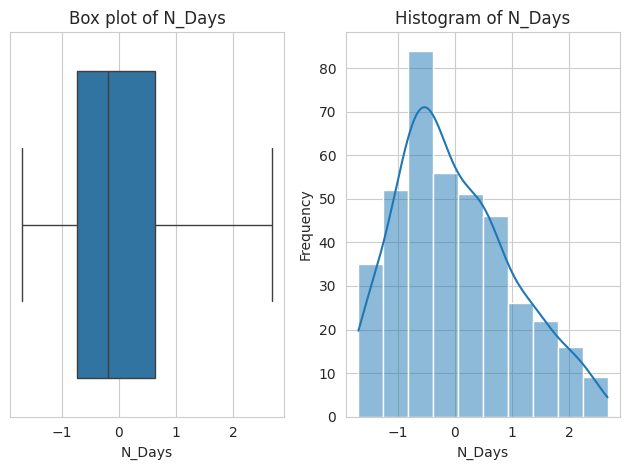

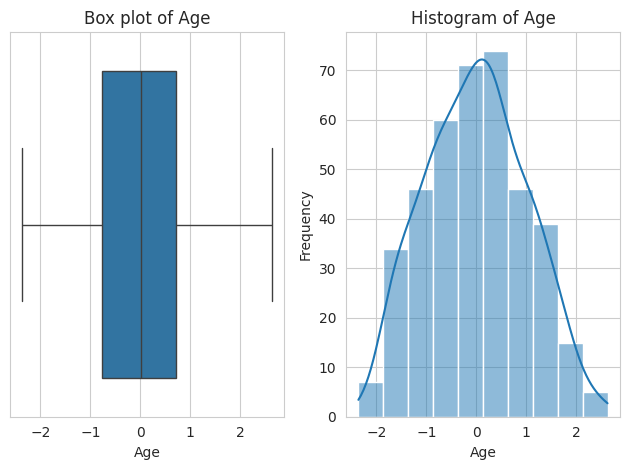

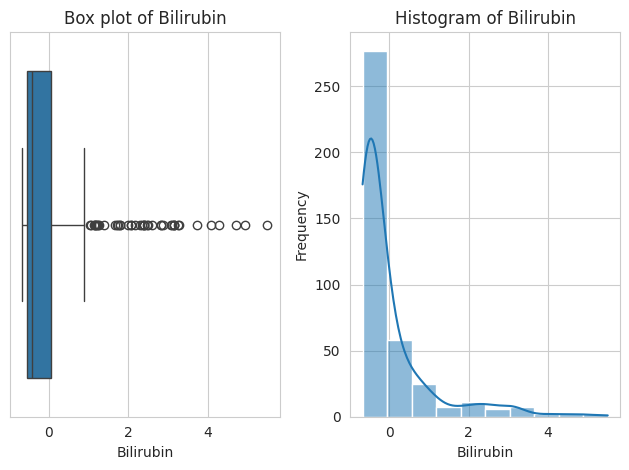

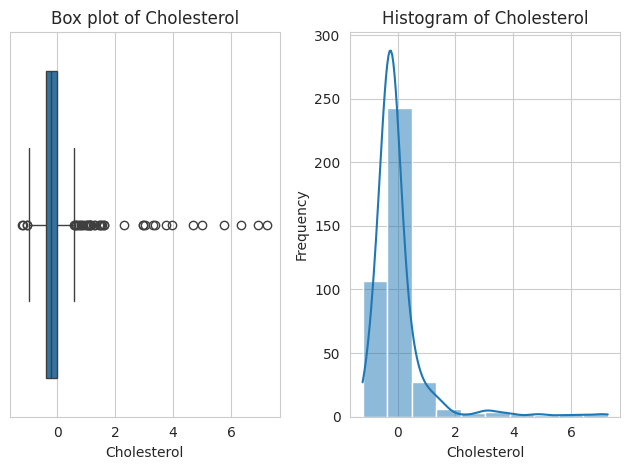

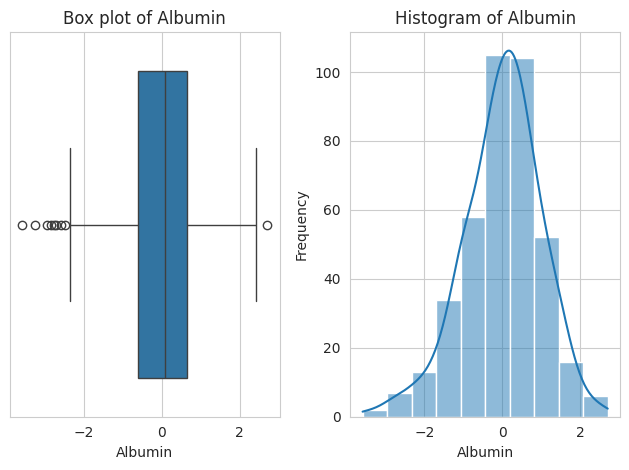

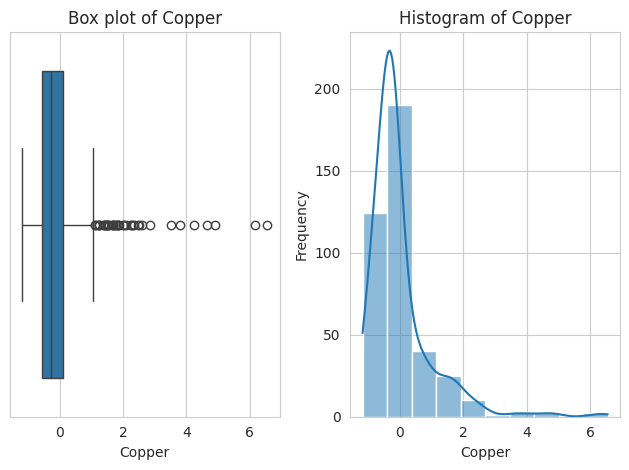

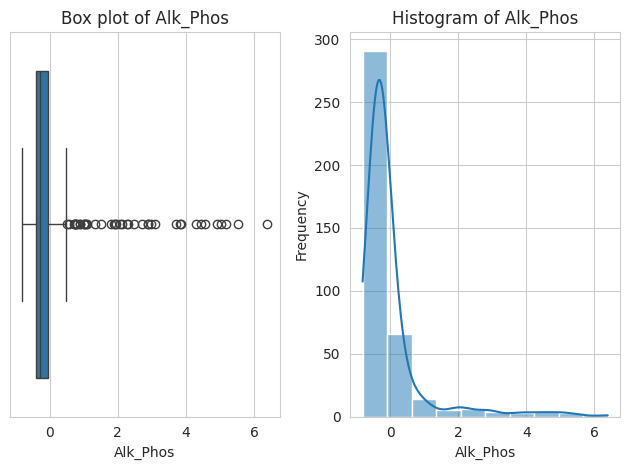

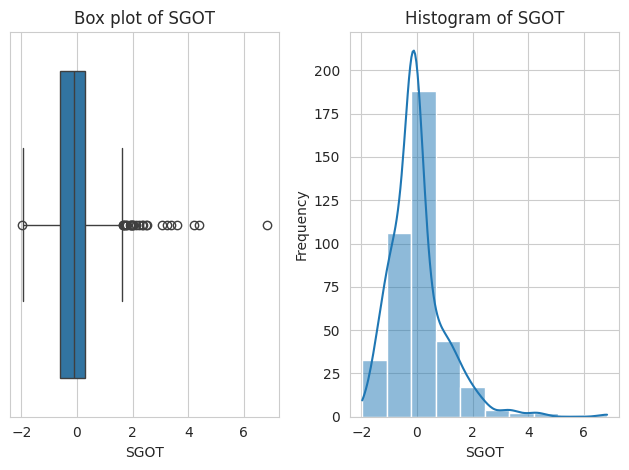

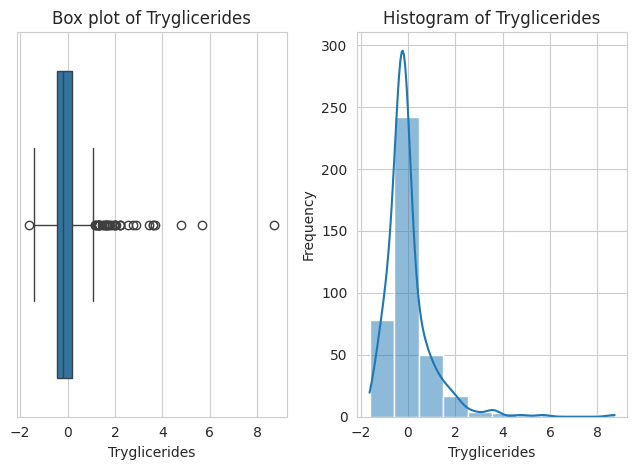

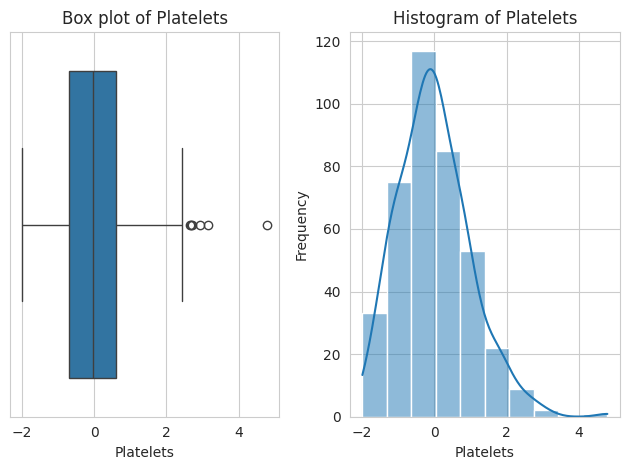

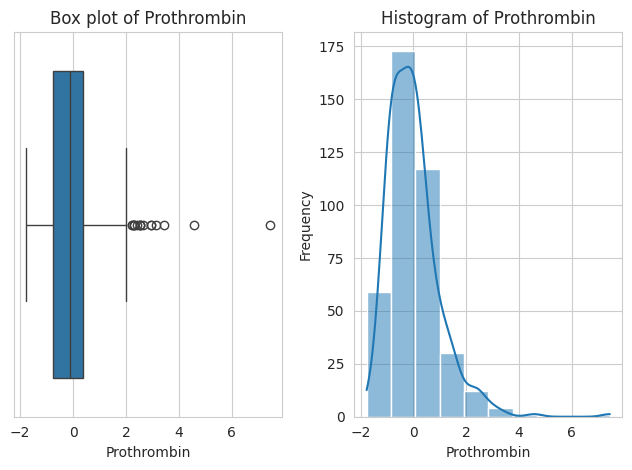

In [23]:
sns.set_style('whitegrid')
def create_variable_plots(variable):
  fig, axes = plt.subplots(1, 2)
  plt.subplot(1, 2, 1)
  sns.boxplot(data = X_stand.dropna(), x = variable)
  plt.xlabel(variable)
  plt.title(f'Box plot of {variable}')

  plt.subplot(1,2,2)
  sns.histplot(data = X_stand.dropna(), x = variable, kde = True, bins = 10)
  plt.xlabel(variable)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {variable}')

  plt.tight_layout()
  plt.show()


for variables in num_variables:
  create_variable_plots(variables)

In [24]:
scaled_whole_dataset = pd.concat([X_stand, cir[cat_variables]], axis = 1, join = 'inner')
print(scaled_whole_dataset.shape)
# scaled_whole_dataset.isnull().sum()
print(cir.shape)

(376, 19)
(397, 20)


In [25]:
(scaled_whole_dataset.columns)

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Stage'],
      dtype='object')

In [26]:
X = scaled_whole_dataset.drop(['N_Days', 'Stage'], axis=1)
y = scaled_whole_dataset['Stage']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [33]:
X_train.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
218,-0.073282,-0.651914,-0.454077,-1.095916,-0.606467,-0.432077,0.216906,-0.630064,0.100388,-0.132226,0,1.0,1,0.0,0.0,0.0,0
105,0.179803,-0.026608,-0.494959,1.911432,1.526034,-0.411373,-0.257876,-0.794940,0.131205,0.992731,-1,0.0,1,1.0,1.0,0.0,0
320,0.483452,-0.339261,-0.203676,0.360768,-0.255465,-0.285288,-0.115952,-0.190394,-1.173384,-0.745840,0,1.0,0,0.0,1.0,0.0,-1
332,0.292197,-0.428590,-0.203676,0.783677,-0.255465,-0.285288,-0.115952,-0.190394,-0.063970,-0.439033,-1,1.0,1,0.0,1.0,0.0,0
382,-1.047631,0.286046,-0.203676,0.266789,-0.255465,-0.285288,-0.115952,-0.190394,0.839997,-0.336764,1,1.0,1,0.0,1.0,0.0,-1


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print(log_model.score(X_train, y_train))
log_model.score(X_test, y_test)

0.5855513307984791


0.415929203539823

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
model = RandomForestClassifier(n_estimators=50, criterion = 'log_loss', max_depth = 20, min_samples_leaf = 4, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=20, min_samples_leaf=4,
                       n_estimators=50, random_state=42)

In [36]:
print(model.score(X_train, y_train))
model.score(X_test, y_test)

0.8935361216730038


0.4247787610619469

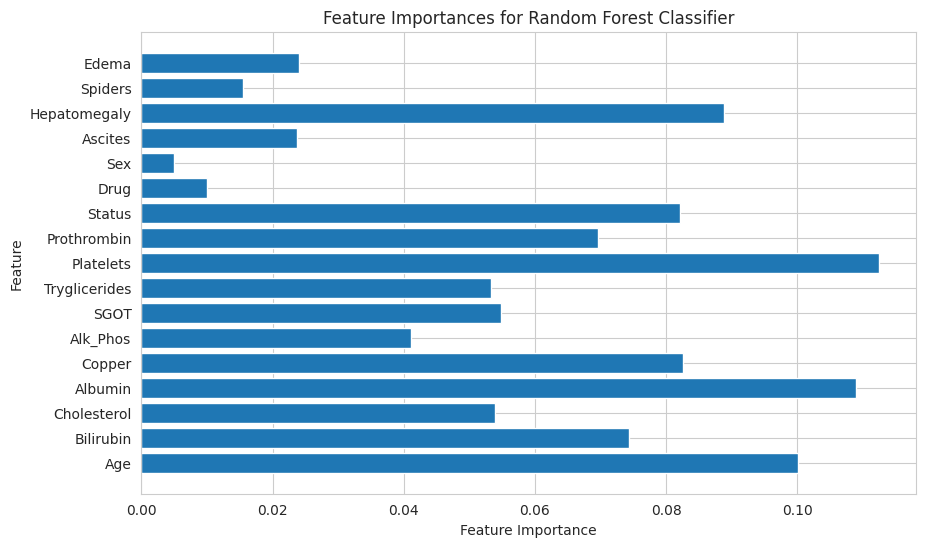

In [37]:
feature_importances = model.feature_importances_

# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for Random Forest Classifier")
plt.show()

In [38]:
X_train_important = X_train[X_train.columns[feature_importances > 0.04]]
X_test_important = X_test[X_test.columns[feature_importances > 0.04]]
X_train_important.head()

,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status,Hepatomegaly
218,-0.073282,-0.651914,-0.454077,-1.095916,-0.606467,-0.432077,0.216906,-0.630064,0.100388,-0.132226,0,0.0
105,0.179803,-0.026608,-0.494959,1.911432,1.526034,-0.411373,-0.257876,-0.794940,0.131205,0.992731,-1,1.0
320,0.483452,-0.339261,-0.203676,0.360768,-0.255465,-0.285288,-0.115952,-0.190394,-1.173384,-0.745840,0,1.0
332,0.292197,-0.428590,-0.203676,0.783677,-0.255465,-0.285288,-0.115952,-0.190394,-0.063970,-0.439033,-1,1.0
382,-1.047631,0.286046,-0.203676,0.266789,-0.255465,-0.285288,-0.115952,-0.190394,0.839997,-0.336764,1,1.0


In [39]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_important, y_train)
log_model.score(X_test_important, y_test)

0.3805309734513274

In [40]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score,classification_report

In [41]:
def eval(y_train, y_pred_train, y_test, y_pred_test):
  print("-" * 20, "Train Set", "-" * 20)
  recall_train = recall_score(y_train,y_pred_train,average="macro")
  precision_train = precision_score(y_train,y_pred_train,average="macro")
  f1_train = f1_score(y_train,y_pred_train,average="macro")
  accuracy_train = accuracy_score(y_train,y_pred_train)
  rep_train = classification_report(y_train,y_pred_train)
  print(rep_train)

  print("-" * 20, "Train Set", "-" * 20)
  recall_test = recall_score(y_test,y_pred_test,average="macro")
  precision_test = precision_score(y_test,y_pred_test,average="macro")
  f1_test = f1_score(y_test,y_pred_test,average="macro")
  accuracy_test = accuracy_score(y_test,y_pred_test)
  rep_test = classification_report(y_test,y_pred_test)
  print(rep_test)

  # return (recall_train, precision_train, f1_train, accuracy_train), (recall_test, precision_test, f1_test, accuracy_test)

In [42]:
log_model = LogisticRegression(max_iter=50000)
log_model.fit(X_train_important, y_train)
log_model.score(X_test_important, y_test)
log_model.score(X_train_important, y_train)

y_pred_test = log_model.predict(X_test_important)
y_pred_train = log_model.predict(X_train_important)

eval(y_train, y_pred_train, y_test, y_pred_test)

-------------------- Train Set --------------------
              precision    recall  f1-score   support

         2.0       0.47      0.16      0.23        58
         3.0       0.55      0.69      0.62       111
         4.0       0.61      0.68      0.64        94

    accuracy                           0.57       263
   macro avg       0.55      0.51      0.50       263
weighted avg       0.56      0.57      0.54       263

-------------------- Train Set --------------------
              precision    recall  f1-score   support

         2.0       0.29      0.12      0.17        32
         3.0       0.34      0.57      0.42        37
         4.0       0.49      0.41      0.44        44

    accuracy                           0.38       113
   macro avg       0.37      0.37      0.35       113
weighted avg       0.38      0.38      0.36       113



In [43]:
model = RandomForestClassifier(n_estimators=50, criterion = 'log_loss', max_depth = 20, min_samples_leaf = 8, random_state=42)
model.fit(X_train_important, y_train)
print(log_model.score(X_train_important, y_train), log_model.score(X_test_important, y_test))


0.5703422053231939 0.3805309734513274


In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier

ada = AdaBoostClassifier(random_state=28)
ada.fit(X_train_important, y_train)
print(ada.score(X_train_important, y_train), ada.score(X_test_important, y_test))

0.6996197718631179 0.415929203539823


In [45]:
bgc = BaggingClassifier(random_state=28)
bgc.fit(X_train, y_train)
print(bgc.score(X_train, y_train), bgc.score(X_test, y_test))
y_train_pred = bgc.predict(X_train)
y_test_pred = bgc.predict(X_test)

eval(y_train, y_train_pred, y_test, y_test_pred)

0.9847908745247148 0.40707964601769914
-------------------- Train Set --------------------
              precision    recall  f1-score   support

         2.0       0.97      0.97      0.97        58
         3.0       0.98      0.99      0.99       111
         4.0       1.00      0.99      0.99        94

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263

-------------------- Train Set --------------------
              precision    recall  f1-score   support

         2.0       0.34      0.31      0.33        32
         3.0       0.38      0.54      0.45        37
         4.0       0.50      0.36      0.42        44

    accuracy                           0.41       113
   macro avg       0.41      0.41      0.40       113
weighted avg       0.42      0.41      0.40       113

